In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Now there is null in Age and Cabin but as cabin no is not necessary for our analysis as yet we will focus mainly on the age for now**
* For it we will replace the null with the median on the basis of Sex also

In [4]:
Sex_median = df.groupby('Sex')['Age'].median()
Sex_median['male']

np.float64(29.0)

In [5]:
df.loc[(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = Sex_median['male']
df.loc[(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = Sex_median['female']
df.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Here we have clearly solve the age fill up issue
* Now we will make a family column 

In [7]:
df['Family_members'] = df['SibSp'] + df['Parch'] + 1 #including himself
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**Now we will differentiate in Mr and Master so that we can confer easily how many bachelors were there on the ship**

In [8]:
df['Bachelors'] = 0
df.loc[(df['Name'].str.contains('Mister'))|(df['Name'].str.contains('Miss')),'Bachelors'] = 1;
#.str accessor very important

**Now we will divide according to fare**
* specially qcut function

In [9]:
df['Fare_Category'] = pd.qcut(df['Fare'], q = 4, labels = ['Low','Medium','High','Expensive'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Bachelors,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,Medium


# Plotting it now

<Axes: xlabel='Fare_Category', ylabel='count'>

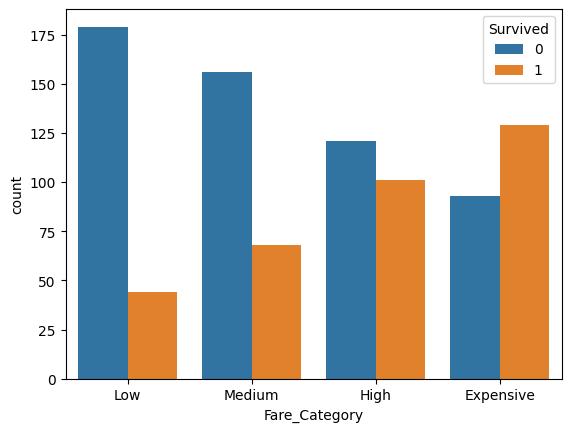

In [10]:
sns.countplot(df,x = 'Fare_Category',hue = 'Survived')

**You can see there is a complete correlation between the price of the ticket and survival project**

**Pie plot for Survival according to sex**

<Axes: ylabel='Survived'>

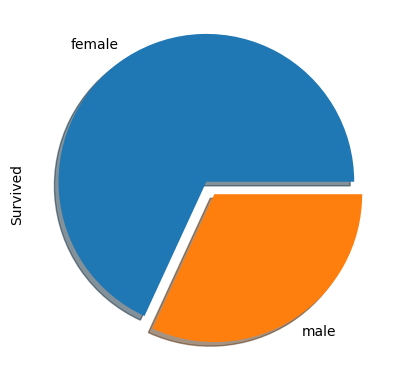

In [11]:
explode = [0.1,0];
df.groupby('Sex')['Survived'].sum().plot(kind = 'pie',explode = explode, shadow = True)
# Now the reason the .sum() doesn't count the not survived category cuz the 0's naturally doesn't add in ths sum operations

Here we can clearly see that among the survivors the female had clearly the larger proportion

# Let's make a age distribution now with the help of histogram

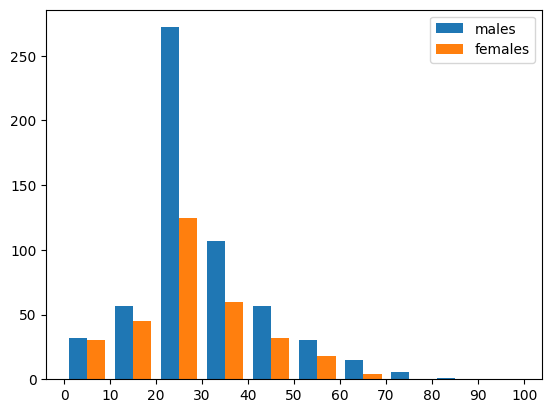

In [12]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist([df.loc[df['Sex']=='male','Age'],df.loc[df['Sex']=='female','Age']],bins = bins, label = ['males','females'])
plt.xticks(bins)
plt.legend()
plt.show()

We can clearly see the males are more than the females and we can also confer that according to their particular age. Though there is not uch difference among children

# A count plot based on survival based on classes

<Axes: xlabel='Pclass', ylabel='count'>

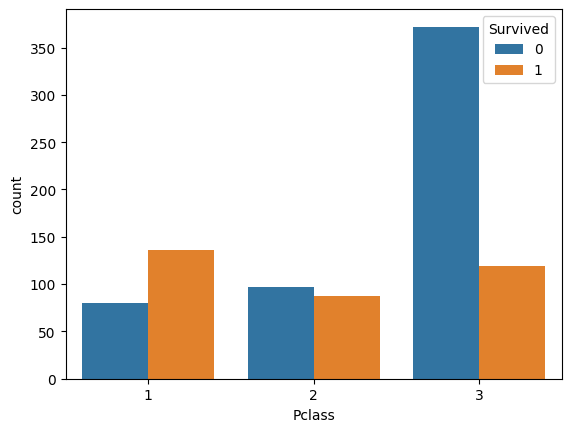

In [13]:
sns.countplot(df, x='Pclass', hue = 'Survived' )

We can see here the survival rate was clearly high in high classes

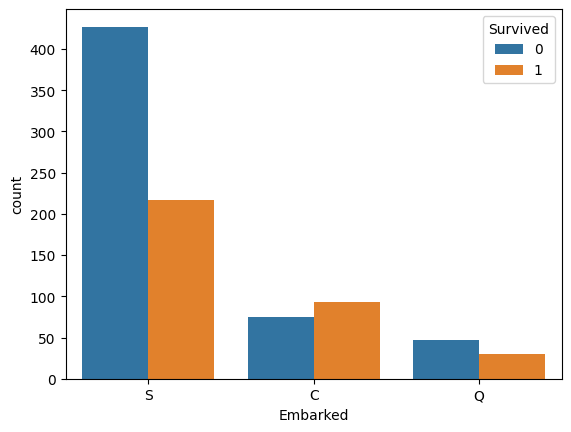

In [14]:
sns.countplot(df,x = 'Embarked', hue = "Survived")
plt.show()



Southhampton had more passengers hence more dead but you can see the survival rate of Cherbrough is clearlly high

<Axes: xlabel='Pclass', ylabel='Fare'>

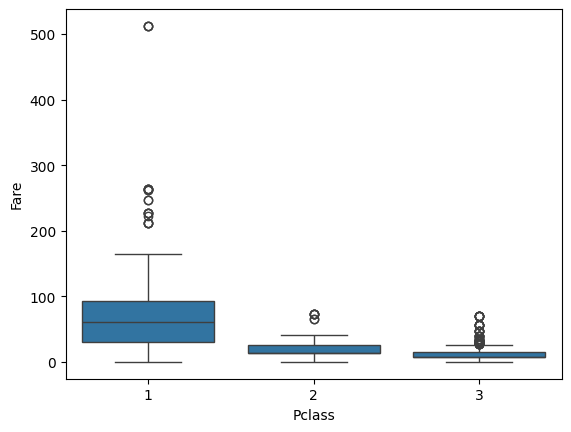

In [15]:
sns.boxplot(df,x = "Pclass", y = "Fare")

* Here we can see obviouslly see that the first class paid more price.
* By research that I found that the outliers in first class are because of the rich suite they paid for
* and in third class there are outliers are because they generally paid for the whole simultaneously so the fair is high
* and obviously the mean fare was high of 1st class

# Age distribution with the help of kde plot

<Axes: xlabel='Age', ylabel='Count'>

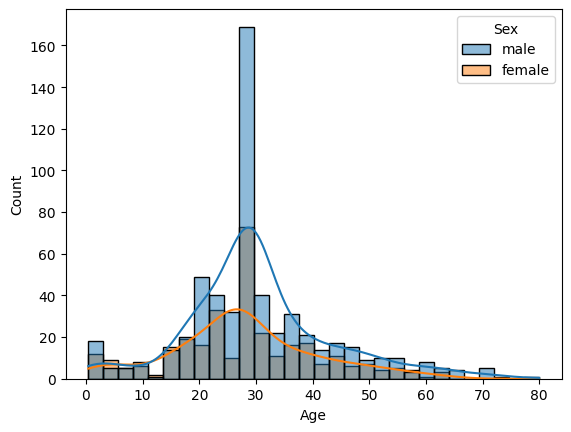

In [16]:
sns.histplot(df,x= 'Age',hue = 'Sex',kde = True)

* We can see that at the age of 30 both in males and females the numbers of passengers was high.
* It is also way easier to plot the histogram with the help of seaborn instead of matplotlib.

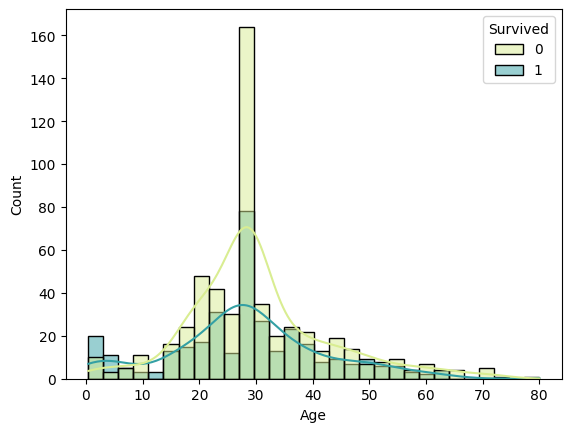

In [17]:
colors = {
    0 : "#d9ed92",
    1 : "#34a0a4"
}
sns.histplot(df, x = 'Age', hue = "Survived", kde = True, palette = colors)
plt.show()

* You can clearly see the percentage of surviving in particularly in the young age was quite high.
* Although the survival rate was quite good in old age also.
* there were some outliers here and there also.

# Does Survival Rate Depend on family size?

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Bachelors,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,Medium


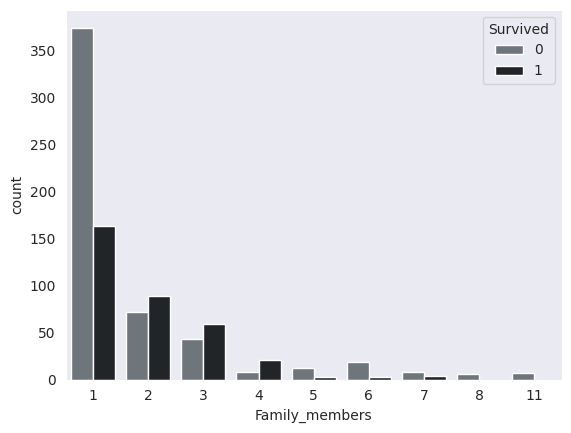

In [19]:
colors = {
    0 : "#6c757d",
    1 : "#212529"
}
sns.set_style('dark')
sns.countplot(df, x = "Family_members", hue = "Survived", palette = colors)
plt.show()

**The following thoughts can be infer from this plot**
* First the majority travellers on board were solo travellers.
* There was clearly a "Solo Cursed" seeing the data solo travellers died more and survived less
* There was a sweet spot for family containing 2-3 members which tells us that they stayed together.
* Similar can't be said for huge families as naturally it was hard for them to stick together.

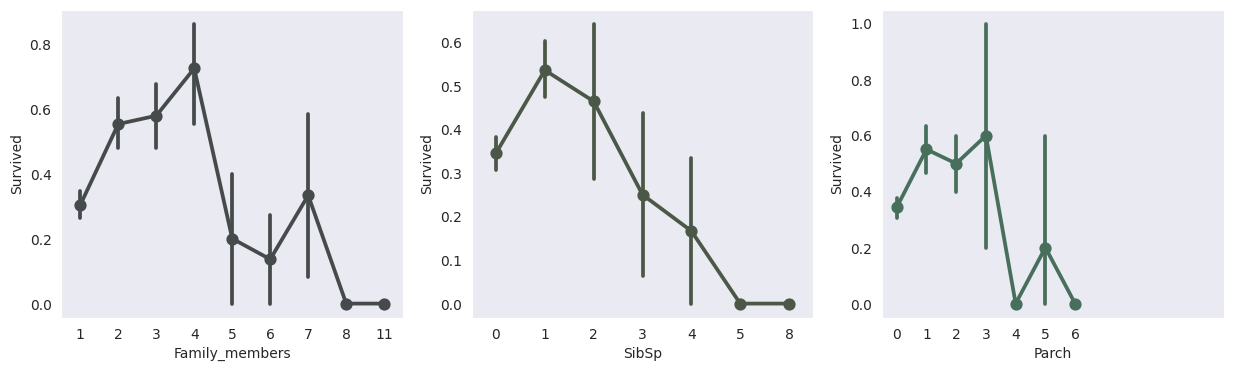

In [20]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
sns.pointplot(df,x = "Family_members", y = "Survived", color = '#454a4a', ax = ax[0])
sns.pointplot(df,x = "SibSp", y = "Survived", color = '#4b5847', ax = ax[1])
sns.pointplot(df,x = "Parch", y = "Survived", color = '#476f5b', ax = ax[2])
plt.xticks(range(12))
plt.show()

**Understanding The Graph**
* The following graph is called "Point Plot".
* This is the similar data as previous graph but in here we can clearly visualise the data.
* The x axis tells us about the number of family members.
* The y axis is the probability.
* The vertical lines is the "uncertainity" due to "fewer sample size"

**Understanding the plots**
* All the three plots presented here present a similar story.
* Having few companions(siblings/ parents/ children) helped, it may be because they increased the will of a person to survive.
* But having too many increased the dependencies, slowed them, they have to prioritise someone over the other, which unfortunately accumulated in the decreased survival rate which we can see here.

<Axes: xlabel='Pclass', ylabel='Survived'>

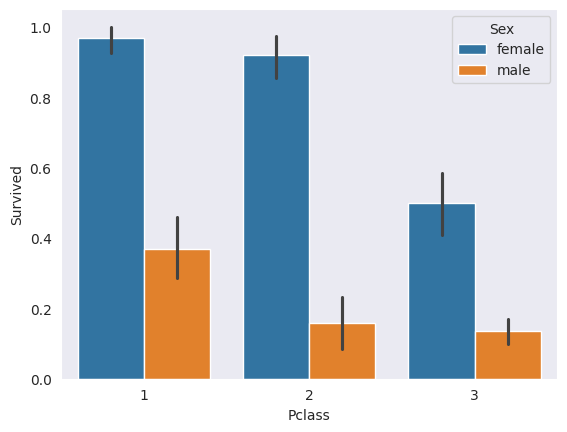

In [21]:
sns.barplot(df, x = "Pclass", y = "Survived", hue = "Sex")

Here you get a very different observation, first we can clearly see that survival rate of women is clearly high which is not new, but the most important info is that **The survival rate of third class women was higher than the survival rate of first class man**.

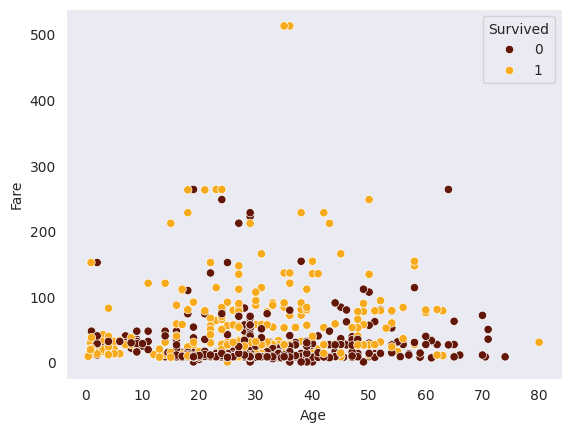

In [22]:
color_scatter = {
    0 : "#621708",
    1 : "#f6aa1c"
}
sns.scatterplot(df,x= "Age", y = "Fare", hue = "Survived", palette = color_scatter)
plt.show()

The aged people who had given high fare had high chance of survival now it also shows as the ticket of a large family was large hence they got help from the family. There is also the child section which has a lot of survival rate irrespective of fare price.

In [23]:
X = df.drop(['Name','Sex','Ticket','Cabin','Embarked','Family_members','Bachelors','Fare_Category'],axis = 1)
X.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<Axes: >

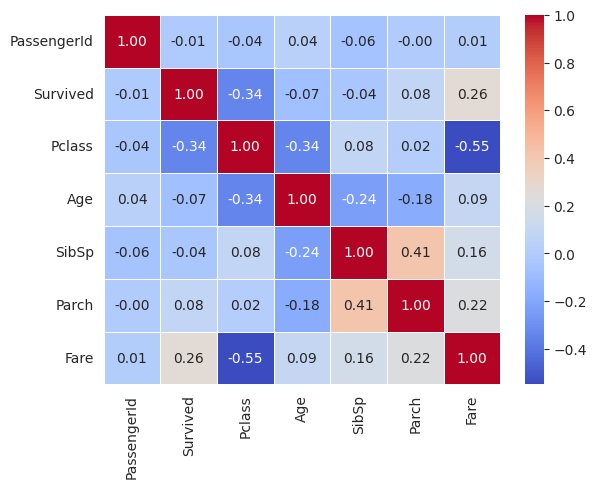

In [24]:
corr = X.corr() # Here we made a correlation matrix to use it in the heatmap

sns.heatmap(
    corr,             # Here the data is present
    annot=True,       # this means that the data will be present on the block
    cmap="coolwarm",  # gives the color styling
    fmt=".2f",        # upto how many decimal number it will be present
    linewidths=0.5    # linewidth between the blocks
)

***What The Graph Says***
* Firstly, it is made up of correlation matrix the number on top of these boxes tells us about the correlation between the two points.
* The higher the number(on any side), the higher the correlation.
* If the number is negative the correlation is inverse.
* If the number is opposite the correlation is positive.
* If it is near to zero there is no correlation between the two entities.

# Make the aged family data remember

<Axes: xlabel='Pclass', ylabel='Fare'>

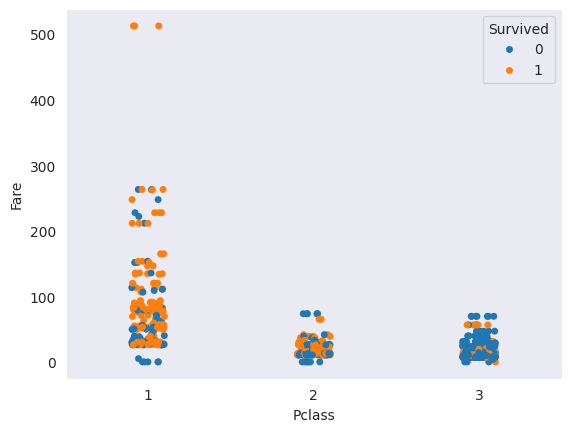

In [25]:
sns.stripplot(df, x= 'Pclass',y = 'Fare', hue = 'Survived', s= 5)
# Make Strip plot instead of swarm when there are many points

**You can clearly see the higher survival rate of the higher class is more. Not only that as the fare rate increases in each class especially in first class the rate of survival also increases**